In [1]:
# Import Libaries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [28]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

In [20]:
df_ft = df.copy()
df_pt = df.copy()
df_c = df.copy()
df_i = df.copy()

In [21]:
df_ft = df_ft[df_ft['job_schedule_type'] == 'Full-time' ].groupby('job_title_short').size().reset_index(name='posting_count').sort_values(by='posting_count', ascending=False)
df_pt = df_pt[df_pt['job_schedule_type'] == 'Part-time' ].groupby('job_title_short').size().reset_index(name='posting_count').sort_values(by='posting_count', ascending=False)
df_c = df_c[df_c['job_schedule_type'] == 'Contractor' ].groupby('job_title_short').size().reset_index(name='posting_count').sort_values(by='posting_count', ascending=False)
df_i = df_i[df_i['job_schedule_type'] == 'Internship' ].groupby('job_title_short').size().reset_index(name='posting_count').sort_values(by='posting_count', ascending=False)

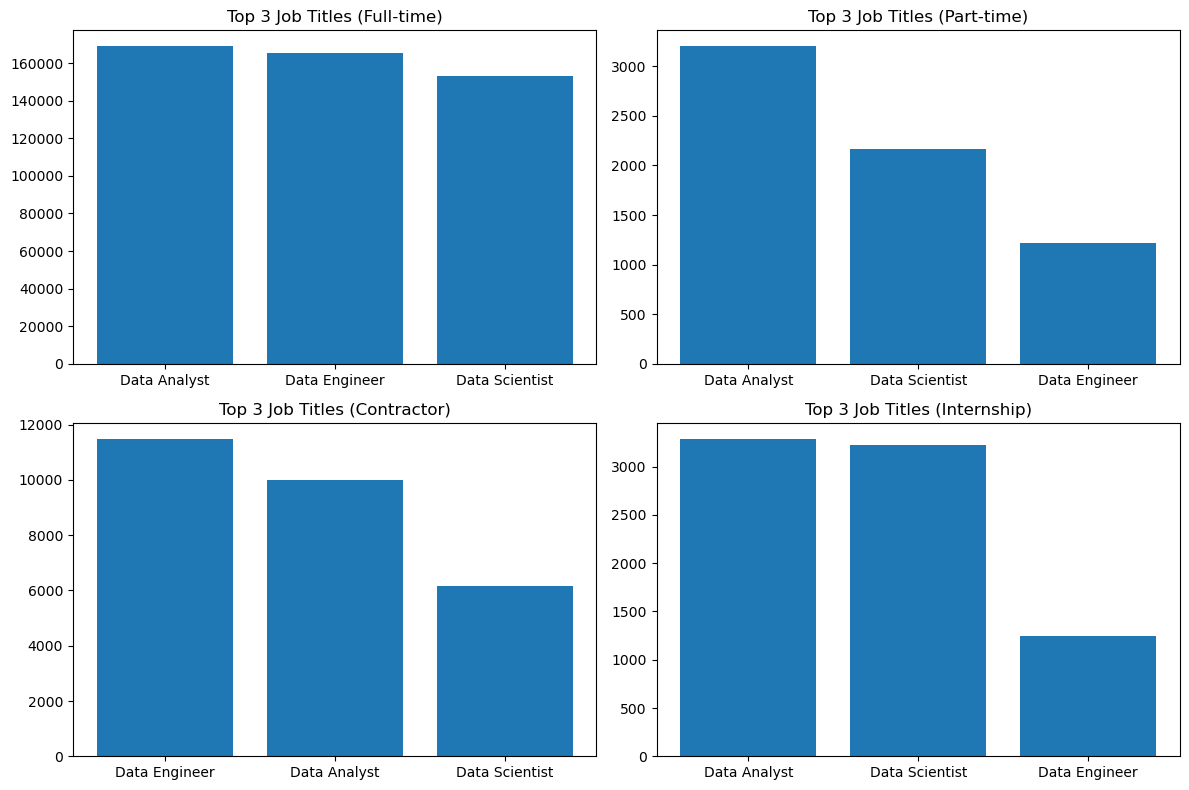

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')
    

fig.tight_layout()
plt.show()